In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [2]:
def pps(n,ND) :
    P=n*100/ND
    PP= "{:.2f}".format(P)
    print("\r",end="")
    print("processes",PP,"% completed:   ",end="")
    i=50*n/ND
    a=50-int(i)
    b=(int(i)+1)*"🟩"
    c=(a-1)*"⬜️"
    print(b,end="")
    print(c, end="")
    if n==ND:
        print("\r","computing successfully completed!   ",50*"🟦")

In [3]:
def initial_condition(I0):
    G=nx.read_gpickle('Graph.gpickle')
    for n_0 in G.nodes:
        G.nodes[n_0]['x']='s'
        G.nodes[n_0]['tpe']= 0
        G.nodes[n_0]['tpq']= 0
        G.nodes[n_0]['Q']=0
        if random.random()<I0:
            G.nodes[n_0]['x']='i'
    return G

In [4]:
def Count_nodes(Graph):
    q1node=[]
    q2node=[]
    snode=[]
    enode=[]
    inode=[]
    rnode=[]
    vnode=[]
    for n_1 in Graph.nodes:
        if Graph.nodes[n_1]['Q']==1:
            q1node.append(n_1)
        if Graph.nodes[n_1]['Q']==2:
            q2node.append(n_1)
        if Graph.nodes[n_1]['x']=='s':
            snode.append(n_1)
        if Graph.nodes[n_1]['x']=='e':
            enode.append(n_1)  
        if Graph.nodes[n_1]['x']=='i':
            inode.append(n_1)  
        if Graph.nodes[n_1]['x']=='r':
            rnode.append(n_1)
    data=[]
    data.append(len(snode))
    data.append(len(enode))
    data.append(len(inode))
    data.append(len(rnode))
    data.append(len(q1node))
    data.append(len(q2node))
    return (data,inode)

In [5]:
def SEIR_dynamic(I0,beta,gamma,t_e,t_q,P3):

    G = initial_condition(I0)

    q1data=[]
    sdata=[]
    q2data=[]
    edata=[]
    idata=[]
    rdata=[]

    while len(rdata)<20 or rdata[-1]!=rdata[-3]:

        (data,inode)= Count_nodes(Graph=G)

        sdata.append(data[0])
        edata.append(data[1])
        idata.append(data[2])
        rdata.append(data[3])
        q1data.append(data[4])
        q2data.append(data[5])

        for i in G.nodes:
            if G.nodes[i]['x']=='e':
                if G.nodes[i]['tpe']>=np.random.poisson(t_e,size=1)[0]:
                    G.nodes[i]['x']='i'
                else:
                    G.nodes[i]['tpe']+=1
            if G.nodes[i]['Q']==1 or G.nodes[i]['Q']==2 :
                if G.nodes[i]['tpq']>=np.random.poisson(t_q,size=1)[0]:
                    G.nodes[i]['Q']=0
                else:
                    G.nodes[i]['tpq']+=1
            if G.nodes[i]['Q']==1:
                for j in G.adj[i]:
                    if ((G.nodes[j]['x']=='s') and (G.nodes[j]['Q']==0) and (random.random()<P3/2)):
                        G.nodes[j]['Q']=2
                        G.nodes[j]['tpq']=0
            if i in inode:
                for n_5 in G.adj[i]:
                    if ((G.nodes[n_5]['x']=='s') and (random.random()<P3)):
                        G.nodes[n_5]['Q']=1
                        G.nodes[n_5]['tpq']=0
                    if G.nodes[n_5]['x']=='s':
                        if ((G.nodes[i]['Q']==0) and (random.random()<beta)):
                            G.nodes[n_5]['x']='e'
                        if ((G.nodes[i]['Q']==1) and (random.random()<beta*0.5)):
                            G.nodes[n_5]['x']='e'
                        if ((G.nodes[i]['Q']==2) and (random.random()<beta*0.75)):
                            G.nodes[n_5]['x']='e'
                if random.random()<gamma:
                    G.nodes[i]['x']='r'
                    G.nodes[i]['Q']=0

    RES=[sdata,edata,idata,rdata,q1data,q2data]
    return RES

In [6]:
a=time.time()
data=SEIR_dynamic(I0= 0.01,beta= 0.8,gamma= 1,t_e= 5,t_q= 6,P3= 0.2)
b=time.time()
b-a

0.30299854278564453

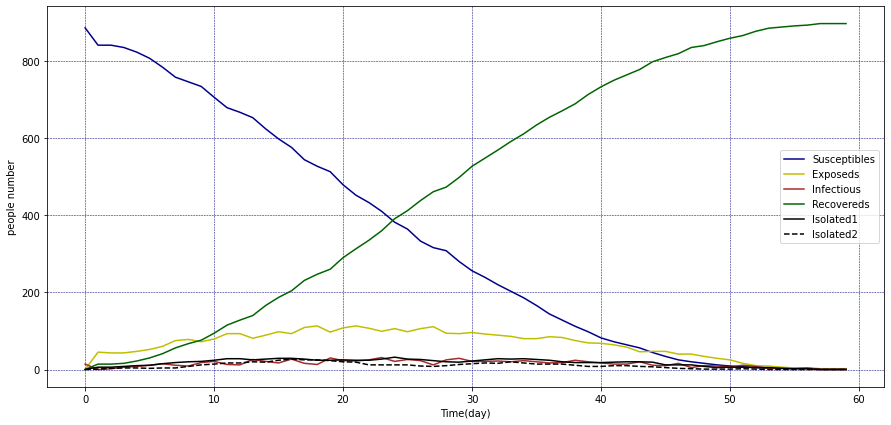

In [7]:
plt.figure(figsize=(15,7))
plt.plot(data[0], 'darkblue', label='Susceptibles')
plt.plot(data[1],'y', label='Exposeds')
plt.plot(data[2],'brown', label='Infectious')
plt.plot(data[3], 'darkgreen', label='Recovereds')
plt.plot(data[4], 'k', label='Isolated1')
plt.plot(data[5], 'k',linestyle = '--', label='Isolated2')
plt.legend(loc=0)
plt.xlabel('Time(day)')
plt.ylabel('people number')
plt.grid(color = 'navy', linestyle = '--', linewidth = 0.5)
plt.savefig('SEIR-Network(3-0)')
plt.show()

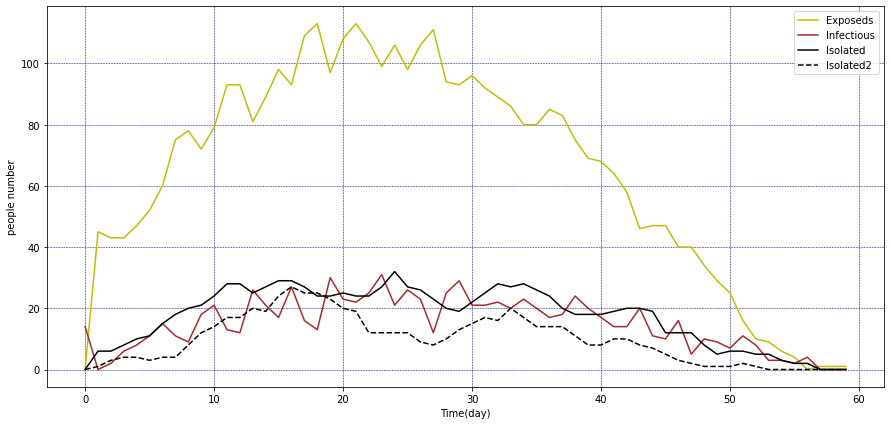

In [8]:
plt.figure(figsize=(15,7))
#plt.plot(data[0], 'darkblue', label='Susceptibles')
plt.plot(data[1],'y', label='Exposeds')
plt.plot(data[2],'brown', label='Infectious')
#plt.plot(data[3], 'darkgreen', label='Recovereds')
plt.plot(data[4], 'k', label='Isolated')
plt.plot(data[5], 'k',linestyle = '--', label='Isolated2')
plt.legend(loc=0)
plt.xlabel('Time(day)')
plt.ylabel('people number')
plt.grid(color = 'navy', linestyle = '--', linewidth = 0.5)
#plt.savefig('SEIR-Network(3-0)')
plt.show()